In [1]:
import numpy as np
import matplotlib.pyplot as plt

import io 
import pandas as pd  
import pyreadr

from load_data import *
from pred_score import *
from Filter_FS import *
from hybrid_FS import *
from overlap_genes import *

# Baseline with preselected genes for BIDDY DO_2

In [2]:
#Load preprocess data
DO2 = np.array(pd.read_csv ('../data/processed_data/DO2csv_process.csv'))
y = np.array(DO2[:,-1],dtype=int)
DO2 = DO2[:,0:-1]

In [3]:
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(DO2,y)

In [4]:
print(DO2.shape, len(pred))
acc = model.score_
print(acc)

(349, 3121) 349
0.4247787610619469


In [5]:
print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

sensitivity, specificity, precision, NPV, FDR, FNR =  (0.6193548387096774, 0.9956058813587967, 0.4247787610619469, 0.9980009487023108, 0.5752212389380531, 0.38064516129032255)


In [ ]:
#Fixing seed to get reproducible results
random.seed(3)
np.random.seed(3)

# Filter methods

# Mutual information maximizer (MIM)

[   7    9   26   30   31   32   46   47   52   63   72   77   78   84
  110  117  131  135  140  151  181  185  215  217  229  274  283  285
  316  319  324  330  338  350  359  362  395  400  420  443  456  460
  469  474  475  476  477  532  546  583  596  619  647  648  649  653
  670  691  707  718  744  782  788  819  826  841  853  859  877  880
  924  933  950  952  970  979  985  993 1002 1005 1014 1027 1057 1075
 1086 1087 1096 1098 1106 1109 1110 1130 1137 1138 1156 1179 1183 1206
 1207 1214 1220 1222 1246 1254 1272 1288 1302 1326 1331 1332 1342 1344
 1345 1352 1387 1388 1398 1455 1456 1476 1477 1497 1503 1536 1550 1552
 1562 1567 1571 1577 1593 1594 1601 1605 1621 1647 1678 1680 1685 1694
 1696 1707 1709 1717 1736 1753 1761 1791 1823 1845 1850 1852 1884 1888
 1889 1893 1917 1918 1937 1948 1959 1960 1987 2020 2039 2043 2044 2046
 2059 2085 2090 2102 2103 2111 2141 2142 2183 2195 2202 2214 2223 2232
 2237 2246 2257 2272 2296 2317 2335 2339 2340 2382 2421 2489 2507 2556
 2557 

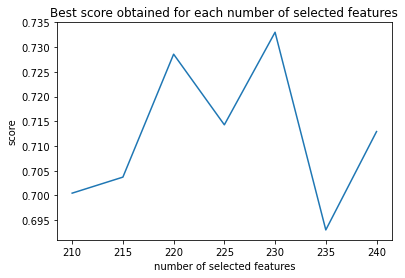

In [6]:
#N = np.array([100,120,140,150,160,180,200,220,240,260,300,350])
N = np.arange(210,241,5)
best_subset, best_score = MIM(y, DO2, FamiliesClusters, compute_precision,True,N, 3, plot=True)
print(best_subset, best_score)

In [7]:
print(len(best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(DO2[:, best_subset],y)

print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

230
sensitivity, specificity, precision, NPV, FDR, FNR =  (0.9041916167664671, 0.9977691246856494, 0.7330097087378641, 0.9993499898435914, 0.2669902912621359, 0.09580838323353294)


In [9]:
DO2_best_subset = [7, 9, 26, 30, 31, 32, 46, 47, 52, 63, 72, 77, 78, 84,
110, 117, 131, 135, 140, 151, 181, 185, 215, 217, 229, 274, 283, 285,
316, 319, 324, 330, 338, 350, 359, 362, 395, 400, 420, 443, 456, 460,
469, 474, 475, 476, 477, 532, 546, 583, 596, 619, 647, 648, 649, 653,
670, 691, 707, 718, 744, 782, 788, 819, 826, 841,  853, 859, 877, 880,
924, 933, 950, 952, 970, 979, 985, 993, 1002, 1005, 1014, 1027, 1057, 1075,
1086, 1087, 1096, 1098, 1106, 1109, 1110, 1130, 1137, 1138, 1156, 1179, 1183, 1206,
1207, 1214, 1220, 1222, 1246, 1254, 1272, 1288, 1302, 1326, 1331, 1332, 1342, 1344,
1345, 1352, 1387, 1388, 1398, 1455, 1456, 1476, 1477, 1497, 1503, 1536, 1550, 1552,
1562, 1567, 1571, 1577, 1593, 1594, 1601, 1605, 1621, 1647, 1678, 1680, 1685, 1694,
1696, 1707, 1709, 1717, 1736, 1753, 1761, 1791, 1823, 1845, 1850, 1852, 1884, 1888,
1889, 1893, 1917, 1918, 1937, 1948, 1959, 1960, 1987, 2020, 2039, 2043, 2044, 2046,
2059, 2085, 2090, 2102, 2103, 2111, 2141, 2142, 2183, 2195, 2202, 2214, 2223, 2232,
2237, 2246, 2257, 2272, 2296, 2317, 2335, 2339, 2340, 2382, 2421, 2489, 2507, 2556,
2557, 2558, 2601, 2615, 2632, 2640, 2649, 2656, 2696, 2722, 2737, 2745, 2753, 2766,
2805, 2816, 2820, 2833, 2856, 2873, 2881, 2891, 2921, 2931, 2958, 2973, 2980, 2991,
3028, 3036, 3039, 3044, 3051, 3107]

# Mutual information feature selection (MIFS)


okay
[  11   12   29   60   70   75   83   93   98  115  121  123  124  125
  132  145  156  171  175  191  205  211  216  237  239  243  246  256
  258  284  290  298  319  329  334  337  338  340  346  349  360  366
  368  394  400  401  418  420  431  432  435  453  484  490  503  517
  521  524  526  528  537  550  555  565  581  583  587  604  611  622
  635  636  648  678  681  692  703  708  718  721  725  730  746  759
  766  788  810  815  824  829  830  835  839  844  845  859  861  875
  891  901  907  912  914  925  929  938  948  959  981  993  994  998
 1000 1001 1002 1012 1014 1020 1022 1025 1051 1058 1064 1088 1107 1109
 1117 1129 1131 1142 1160 1167 1168 1175 1176 1178 1194 1223 1229 1243
 1250 1287 1289 1297 1299 1345 1350 1368 1370 1382 1385 1392 1399 1427
 1445 1454 1461 1469 1477 1542 1547 1554 1557 1560 1566 1579 1582 1588
 1590 1591 1610 1624 1629 1642 1643 1647 1648 1654 1655 1656 1660 1673
 1678 1683 1685 1688 1690 1711 1725 1744 1747 1759 1760 1761 1762 1767
 

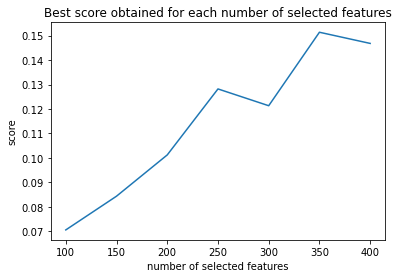

In [69]:
N = np.array([100,150,200,250,300,350,400])
best_subset, best_score = MIFS(y, DO2, FamiliesClusters, compute_precision,True,N, 0.1, plot=True)
print(best_subset, best_score)

In [70]:
print(len(best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(DO2[:, best_subset],y)

print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

350
sensitivity, specificity, precision, NPV, FDR, FNR =  (0.3958333333333333, 0.991027801179444, 0.15139442231075698, 0.9975408098367606, 0.848605577689243, 0.6041666666666666)


# Joint Mutual Information (JMI)

[   0    2    3    4    5    6    7    8    9   13   15   18   20   30
   31   32   33   36   39   40   41   43   46   49   52   54   67   69
   72   76   88   90   91   92   94   95   96  100  106  110  111  114
  122  127  129  133  134  140  147  154  157  158  162  163  164  177
  180  181  183  184  186  188  189  190  197  198  199  200  202  203
  209  221  224  225  227  230  232  233  234  236  247  250  262  265
  271  272  276  279  287  294  296  301  308  315  327  330  331  335
  341  354  358  359  364  367  375  376  383  386  387  389  391  392
  395  398  399  403  406  409  411  412  415  416  419  423  424  430
  433  434  436  437  440  445  451  454  458  459  460  462  463  464
  465  476  485  487  488  492  495  501  505  511  512  513  519  522
  543  545  547  550  553  559  560  563  564  584  586  590  592  598
  599  603  605  608  613  616  618  621  625  627  630  631  632  642
  650  652  653  656  657  658  660  661  662  664  665  669  672  679
  688 

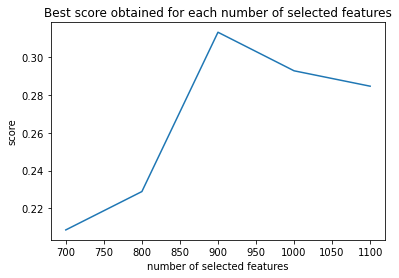

In [37]:
N = np.array([700,800,900,1000,1100])
best_subset, best_score = JMI(y, DO2, FamiliesClusters, compute_precision ,True, N, plot=True)
print(best_subset, best_score)

In [39]:
print(len(best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(DO2[:, best_subset],y)

print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

900
sensitivity, specificity, precision, NPV, FDR, FNR =  (0.5454545454545454, 0.9938939557891483, 0.3130434782608696, 0.9976724338583288, 0.6869565217391305, 0.45454545454545453)


# Double input symmetrical relevance (DISR)

[   0    2    4    5    6    7    8    9   13   15   31   36   40   41
   46   52   67   69   76   88   90   92   94  100  106  114  127  129
  133  140  147  157  162  163  164  177  181  188  190  197  209  224
  227  230  236  262  265  272  287  294  296  308  315  327  330  341
  354  358  359  367  375  383  386  387  391  399  403  406  409  419
  424  430  433  434  436  440  445  454  459  463  465  476  488  492
  495  505  511  512  513  519  522  543  545  547  550  563  564  584
  590  598  603  608  613  618  621  627  630  642  650  658  660  661
  664  665  672  679  697  699  710  717  724  729  738  761  775  798
  802  803  806  821  825  833  837  865  876  886  895  902  911  918
  932  933  937  955  956  977  980  983 1005 1006 1009 1015 1030 1034
 1035 1037 1039 1041 1044 1061 1066 1073 1081 1083 1084 1087 1093 1100
 1102 1105 1106 1113 1133 1143 1153 1161 1163 1169 1172 1177 1183 1186
 1195 1200 1201 1202 1204 1205 1215 1216 1217 1221 1224 1227 1231 1232
 1233 

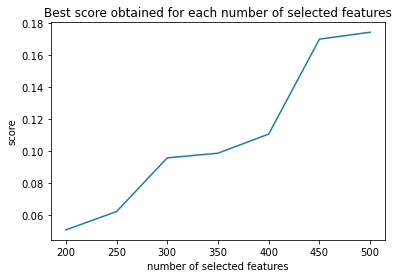

In [6]:
N = np.arange(200,501,50)
best_subset, best_score = DISR(y, DO2, FamiliesClusters, compute_precision,True, N, plot=True)
print(best_subset, best_score)

In [8]:
print(len(best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(DO2[:, best_subset],y)

print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

500
sensitivity, specificity, precision, NPV, FDR, FNR =  (0.3783783783783784, 0.991889799078942, 0.17427385892116182, 0.9971729421887163, 0.8257261410788381, 0.6216216216216216)


# Fisher's score

[   0    1    2 ... 3118 3119 3120] 0.5


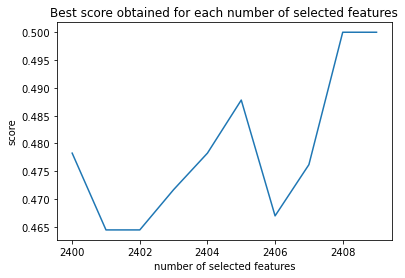

In [35]:
N = np.arange(2400,2410,1)
best_subset, best_score = fishers_score(y, DO2, FamiliesClusters,compute_precision,True,N, plot=True)
print(best_subset, best_score)

In [36]:
print(len(best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(DO2[:, best_subset],y)

print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

2408
sensitivity, specificity, precision, NPV, FDR, FNR =  (0.5975609756097561, 0.9969822011455318, 0.5, 0.9979656001479563, 0.5, 0.4024390243902439)


# Laplacian score

[   0    1    2 ... 3118 3119 3120] 0.46859903381642515


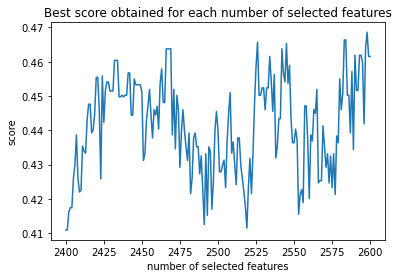

In [57]:
N = np.arange(2400,2601,1)
best_subset, best_score = laplacian_score(y, DO2, FamiliesClusters,compute_precision,True, N, plot=True)
print(best_subset, best_score)

In [58]:
print(len(best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(DO2[:, best_subset],y)

print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

2598
sensitivity, specificity, precision, NPV, FDR, FNR =  (0.6217948717948718, 0.996503274206879, 0.46859903381642515, 0.9981214378960105, 0.5314009661835749, 0.3782051282051282)


# ReliefF algorithm

[   0    2    4 ... 3106 3107 3108] 0.41203703703703703


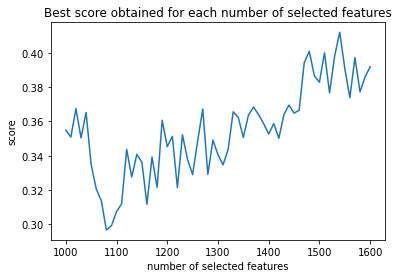

In [65]:
N = np.arange(1000,1601,10)
best_subset, best_score = reliefF(y, DO2, FamiliesClusters,compute_precision,True, N, 5, plot=True)
print(best_subset, best_score)

In [66]:
print(len(best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(DO2[:, best_subset],y)

print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

1540
sensitivity, specificity, precision, NPV, FDR, FNR =  (0.5855263157894737, 0.9957566240101574, 0.41203703703703703, 0.9978905072827725, 0.5879629629629629, 0.4144736842105263)


# Fast Correlation Based Filter algorithm (FCBF)

[   0    1    2 ... 3118 3119 3120] 0.47058823529411764


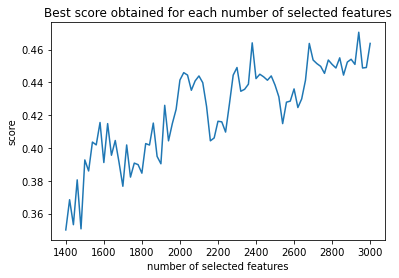

In [74]:
N = np.arange(1400,3001,20)
best_subset, best_score = FCBF(y, DO2, FamiliesClusters,compute_precision,True, N, plot=True)
print(best_subset, best_score)

In [76]:
print(len(best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(DO2[:, best_subset],y)

print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

2940
sensitivity, specificity, precision, NPV, FDR, FNR =  (0.6193548387096774, 0.9966375042809552, 0.47058823529411764, 0.9981602743997505, 0.5294117647058824, 0.38064516129032255)


# Hilbert Schmidt Independence Criterion Lasso (HSIC Lasso)

Block HSIC Lasso B = 20.
M set to 3.
Using Gaussian kernel for the features, Delta kernel for the outcomes.
Block HSIC Lasso B = 20.
M set to 3.
Using Gaussian kernel for the features, Delta kernel for the outcomes.
Block HSIC Lasso B = 20.
M set to 3.
Using Gaussian kernel for the features, Delta kernel for the outcomes.
[   2    7   12   21   23   27   31   32   46   48   50   53   55   65
   67   70   72   73   75   76   78   85   89   94   97   99  104  107
  111  112  117  118  122  131  134  135  140  141  144  146  147  148
  151  157  161  165  166  167  169  176  181  185  192  193  195  197
  213  214  217  218  227  229  230  233  235  236  238  241  244  248
  249  251  252  254  255  257  261  263  267  269  271  274  275  276
  277  278  282  285  290  295  301  302  306  311  315  319  330  334
  335  336  337  338  339  342  343  347  351  353  354  360  362  368
  375  382  389  394  397  399  400  403  409  416  420  424  439  443
  446  449  450  456  458  460  464  

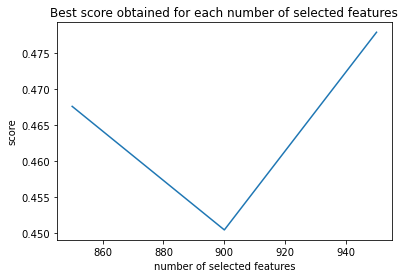

In [10]:
N = np.arange(850,951,50)
best_subset, best_score = HsicLasso(y, DO2, FamiliesClusters,compute_precision,True, N, plot=True)
print(best_subset, best_score)    

In [11]:
print(len(best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(DO2[:, best_subset],y)

print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

950
sensitivity, specificity, precision, NPV, FDR, FNR =  (0.6878980891719745, 0.9957058117107609, 0.4778761061946903, 0.9982123312659613, 0.5221238938053098, 0.31210191082802546)


# Wrapper methods

# Stochastic optimization of features selection 

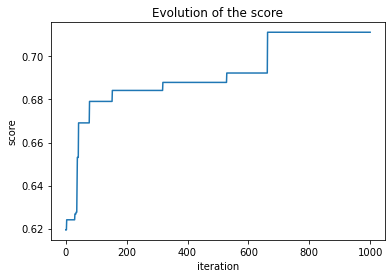

0.7112676056338029


In [18]:
best_subset, best_score  = hillclimbing(y, DO2, FamiliesClusters, compute_sensitivity,True, 1000, 0.1, True)
print(best_score)

In [19]:
print(len(best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_sensitivity,True)
pred = model.fit_predict(DO2[:, best_subset],y)

print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

1603
sensitivity, specificity, precision, NPV, FDR, FNR =  (0.7112676056338029, 0.9954082204054205, 0.45089285714285715, 0.9984647069837109, 0.5491071428571429, 0.2887323943661972)


# Stimulated annealing

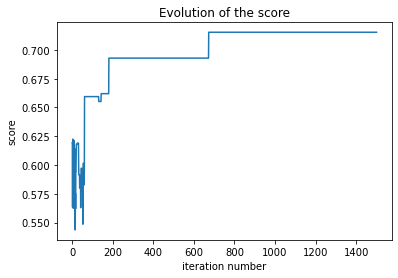

0.7153284671532847


In [20]:
best_subset, best_score  = stimulated_annealing(y, DO2, FamiliesClusters, compute_sensitivity,True, 1500, 0.1, 1, True)
print(best_score)

In [22]:
print(len(best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_sensitivity,True)
pred = model.fit_predict(DO2[:, best_subset],y)

print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

1575
sensitivity, specificity, precision, NPV, FDR, FNR =  (0.7153284671532847, 0.9944402823232522, 0.4100418410041841, 0.9984559958826557, 0.5899581589958159, 0.2846715328467153)


# Genetic feature selection algorithm

In [ ]:
best_subset, best_score  = genetic_fs(y,DO2,FamiliesClusters,compute_sensitivity,True, 500, 0.5, 0.2, 50, 3, True)
print(best_score)

In [ ]:
print(len(best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_sensitivity,True)
pred = model.fit_predict(DO2[:, best_subset],y)

print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

# Hybrid methods

# Mutual information and stimulated annealing

In [ ]:
best_subset, best_score = MI_stimulated_annealing(y,DO2, FamiliesClusters, compute_sensitivity,True, np.array([400]), 3, 5000, 0.05, 1, True)
print(best_subset, best_score)

In [15]:
print(len(best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_sensitivity,True)
pred = model.fit_predict(DO2[:, best_subset],y)

print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

207
sensitivity, specificity, precision, NPV, FDR, FNR =  (0.9548387096774194, 0.9964129684985054, 0.6548672566371682, 0.9996770323890376, 0.34513274336283184, 0.04516129032258064)


# Mutual information and genetic feature selection

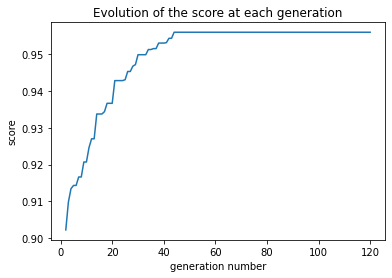

[   2    3    7    9   26   30   31   32   36   40   46   47   53   59
   63   77   78   84   85   97  117  128  130  131  135  139  140  142
  151  166  177  181  185  193  195  204  209  217  226  227  229  233
  237  245  253  263  274  283  285  323  329  330  342  350  353  359
  365  370  376  379  395  400  404  412  417  420  424  425  426  432
  451  456  460  469  471  474  475  476  478  484  492  493  513  522
  526  532  539  545  546  547  591  596  600  601  604  606  612  616
  619  622  624  646  647  649  653  657  665  670  691  693  705  707
  718  719  721  735  737  740  744  746  747  754  758  771  782  788
  791  797  814  815  819  822  826  827  832  833  834  841  849  852
  853  859  875  877  880  891  893  898  908  911  921  922  924  933
  935  940  950  951  952  959  967  970  976  978  985  993  996 1005
 1014 1027 1030 1031 1047 1049 1053 1054 1057 1064 1071 1074 1075 1086
 1087 1096 1097 1098 1106 1107 1109 1110 1115 1117 1121 1129 1130 1133
 1138 

In [16]:
DO2_best_subset, best_score = MI_genetic_fs(y,DO2, FamiliesClusters, compute_sensitivity,True, np.array([700]), 3,  300, 0.5, 0.2, 120, 3, True)
print(DO2_best_subset, best_score)

In [17]:
print(len(DO2_best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(DO2[:, DO2_best_subset],y)

print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

559
sensitivity, specificity, precision, NPV, FDR, FNR =  (0.9573170731707317, 0.997424592954734, 0.7268518518518519, 0.9996937480859255, 0.27314814814814814, 0.042682926829268296)


In [ ]:
DO2_best = get_best_genes_names(DO2_best_subset, '../data/processed_data/DO2genes_interest.csv' ,'../data/optimized_subsets/DO2genes_best.csv')